In [ ]:
#Logistic Regression the Crucial Six Steps - Example: Logit-Simmons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [47]:
#Reading the file
from sklearn.model_selection import train_test_split
mydata=pd.read_csv("examlogit.csv")
mydata=mydata.dropna()
X=mydata.iloc[:,2:5]
Y=mydata.iloc[:,1:2]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_train,X_test=train_test_split(mydata,test_size=0.3,random_state=42)


In [48]:
#Building the Model
import statsmodels.api as sm
import statsmodels.formula.api as smf
logit = smf.logit("Loyalty~Brand+Product+Shopping",data=X_train)
lg=logit.fit() 
print(lg.summary())
prediction=lg.predict()

Optimization terminated successfully.
         Current function value: 0.253897
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Loyalty   No. Observations:                   21
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.6282
Time:                        14:20:08   Log-Likelihood:                -5.3318
converged:                       True   LL-Null:                       -14.341
Covariance Type:            nonrobust   LLR p-value:                 0.0004360
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.9412     14.376     -1.526      0.127     -50.119       6.236
Brand          2.9687      1

In [49]:
#Step1: Overall Validity of the Model:Loglikelyhood
print("LogLikelyhoodRatio=",format(lg.llr_pvalue,"0.6f"))

LogLikelyhoodRatio= 0.000436


In [50]:
#1. Overall, the logistic regression model in this example
#is statistically significant (PValue=0.000436 is less than alpha(0.05))
#Therefore, the model is robust.

In [51]:
#Step2"McFadden R Square
McFaddenR2 = 1-(lg.llf/lg.llnull)
print("McFadden Rsq=",format(McFaddenR2,"0.6f"))

McFadden Rsq= 0.628212


In [52]:
#2. About 62.82% of the uncertainty produced by the
#intercept only model is calibrated or explained by the full model (Intercept +
#slopes of spending and card)

In [66]:
# Step3:Test for Significance of Individual coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = "{:0.4f}".format 
lgcoef

,coef,pval
Intercept,-21.9412,0.1270
Brand,2.9687,0.0937
Product,0.8416,0.3907
Shopping,1.8347,0.1330


In [72]:
#All betas including in this case intercept are not highly significant.
#Therefore some betas should be removed original population model.

In [73]:
#Step4: Odds and Probability 
#Exponential of coef to get odds ratio
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)

#Probability from Odds ratio
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])

#Sort dataframe by decreasing Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef

,coef,pval,Odds_ratio,probability
Brand,2.9687,0.0937,19.4674,0.9511
Shopping,1.8347,0.1330,6.2632,0.8623
Product,0.8416,0.3907,2.3202,0.6988
Intercept,-21.9412,0.1270,0.0000,0.0000


In [74]:
#Step5: Creating the confusion matrix
#Predict probability
Y=X_train["Loyalty"]
pred_prob = lg.predict()
#Compute class from predicted probability
pred_class = (pred_prob>0.5).astype(np.int)
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
#Confusion matrix
print(confusion_matrix(Y.astype(float), pred_class))
print("  ")
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y.astype(float), pred_class),2)
recall = round(recall_score(Y.astype(float), pred_class),2)
precision = round(precision_score(Y.astype(float), pred_class),2)
print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

[[ 8  1]
 [ 2 10]]
  
accuracy:  0.86
recall:  0.83
precision:  0.91


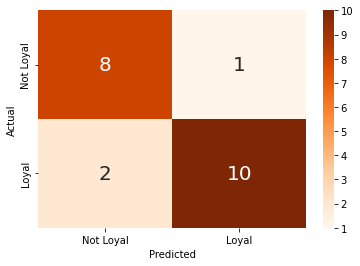

In [75]:
#Better Display of Confusion Matrix
Confusion=confusion_matrix(Y.astype(float), pred_class)
Confusion=sn.heatmap(Confusion,annot=True,cmap=("Oranges"),
                     annot_kws={"size":20},
                    xticklabels=["Not Loyal","Loyal"],
                    yticklabels=["Not Loyal","Loyal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

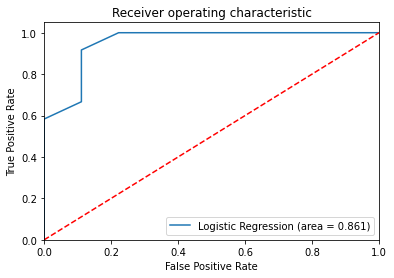

In [76]:
#Step6:ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y.astype(float), pred_class)
fpr, tpr, thresholds = roc_curve(Y.astype(float), pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [77]:
#The ROc Curve is fairly steep and covers are(73%) and appears to separate in a satisfactory manner the 
#true positive from false positive cases.
#**The Model based on training data set appears satisfactory 
#using the six steps approach of the Logistic Regression.

accuracy:  0.78
recall:  1.0
precision:  0.6


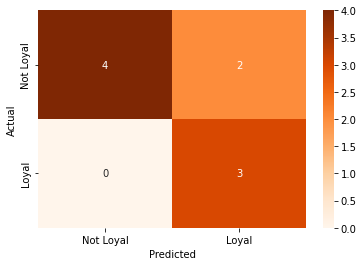

In [79]:
#Compute class from predicted probability
import seaborn as sns
pred_prob=lg.predict(X_test)
pred_class = (pred_prob>0.5).astype(np.int)
pred_class
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y_test.astype(float), pred_class),2)
recall = round(recall_score(Y_test.astype(float), pred_class),2)
precision = round(precision_score(Y_test.astype(float), pred_class),2)

print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

#Confusion matrix
confusion=confusion_matrix(Y_test.astype(float), pred_class)
sns.heatmap(confusion,annot=True,cmap=("Oranges"),
           xticklabels=["Not Loyal","Loyal"],
           yticklabels=["Not Loyal","Loyal"],fmt="0.0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()